<a href="https://colab.research.google.com/github/Adwait-Naravane/Projects--comp-phy-/blob/pendulums/1_pend_with_drag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single bob pendulum with drag





From the equations of motion, we gain a differential equation for a simple pendulum with drag assuming a constant length. 

$$\frac{d^2 \theta}{dt^2} + \frac{b}{m} \frac{d \theta}{dt} + \frac{g}{l} \sin(\theta) = 0$$ 
here we do not assume a small angle and solve this numerically. 






In [1]:
#we are gonna use "scipy.integrate.odeint" to solve this numerically.

import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from scipy.integrate import odeint



In [2]:
#theta will be the matrix for angle and angular velocity.
#the function below is our model.
def model(theta, t, b,g,l,m):
  theta1 = theta[0]
  theta2 = theta[1]
  dtheta1_dt = theta2
  dtheta2_dt = -(b/m)*theta2 - (g/l)*math.sin(theta1)
  dtheta_dt = [dtheta1_dt, dtheta2_dt]
  return dtheta_dt



In [3]:
#define all constants and initial conditions.

b = 0.00
g = 9.81
l = 1
m = 0.1

theta_0 = [math.pi/2, 0]
#theta_n = [-1*math.pi/2, 0]
T = 10
t = np.linspace(0,T, 150)

In [4]:
theta = odeint(model , theta_0, t , args = (b,g,l,m))
#thetan = odeint(model, theta_n, t, args = (b,g,l,m))

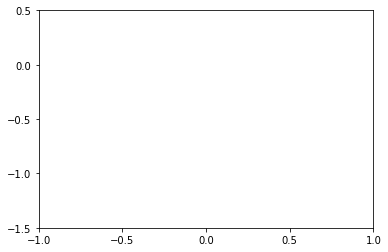

In [5]:
#animation time
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([-1,1])
ax.set_ylim([-1.5, 0.5])
plt.rcParams['font.size'] = 17

lis = []
for i in range(len(theta)):
  ln, = ax.plot([0,np.sin(theta[i,0])], [0, -np.cos(theta[i,0])], color = 'w', lw = 2)
#  ln1, = ax.plot([0,np.sin(thetan[i,0])], [0, -np.cos(thetan[i,0])], color = 'w', lw = 2)

  bob, = ax.plot(np.sin(theta[i,0]), -np.cos(theta[i,0]), 'o', color = 'y', markersize = 10)
#  bob1, = ax.plot(np.sin(thetan[i,0]), -np.cos(thetan[i,0]), 'o', color = 'y', markersize = 10)
  lis.append([ln,bob,])

ani = animation.ArtistAnimation(fig, lis, interval = 50)
ani.save('pend_drag.mp4', writer = 'ffmpeg', fps = 20)